## **Installing Packages**

In [1]:
!pip install textblob
!pip install sentencepiece  
!pip install transformers
!pip install textstat
!pip install language-tool-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 5.3 MB/s 
     |████████████████████████████████| 7.6 MB 34.5 MB/s 
     |████████████████████████████████| 163 kB 15.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 39.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart Runtime after installing 

## **Importing Packages**

In [1]:
import re
import nltk 
import spacy
import textstat
import numpy as np
import pandas as pd
import seaborn as sn 
from textblob import Word
import matplotlib.pyplot as plt
import language_tool_python

from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
tool = language_tool_python.LanguageTool('en-US')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:language_tool_python.download_lt:Unzipping /tmp/tmpn4w6as7h.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


# **Reading Data From Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
Data_Essay_01 = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01.csv")
Data_Essay_01.head()

Mounted at /content/drive


,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score
0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


# **Feature Extraction**

## **Essay Pre Processing**

In [7]:
def Remove_NER(Essay):
  """
    Removes Named Entity Recognition (NER) from each essay

    Args:
      Sentence: Essay of each student 
    
    Returns: 
      String

  """
  token = Essay.split()
  newTokens = []
  # print(token)
  for i in range(len(token)):
    if "@" in token[i]:
      if "," in token[i]:
        newTokens.append(",")
      elif "." in token[i]:
        newTokens.append(".")
      elif "!" in token[i]:
        newTokens.append("!")
    else:
      newTokens.append(token[i])

  return " ".join(newTokens)
  # return ' '.join (word for word in Essay.split(' ') if not word.startswith('@'))

def Remove_Punctuations(sentence):
  """
    Removes punctuations from text
    Args:
      sentence: Essay of each student
    
    Returns: 
      String
  """
  punctuations = '''!()-[]{};:"\,/'<>.?@#$%^&*_~'''
  newSentence = ""
  for word in sentence:
      if (word in punctuations):
          newSentence = newSentence + " "
      else: 
          newSentence = newSentence + word
  return newSentence

def LowerCase_Words(Essay):
  """
    Lower case all the words in an essay

    Args:
      Sentence: Essay of each student
    
    Returns: 
      String
  """
  return re.sub('[0-9]+','', Essay).lower() 

def Tokenize_Essay(Essay):
    """
      Create Tokens of each Essay

      Args:
        Essay: Essay of each student
      
      Returns: 
        String
    """
    Preprocessed = Remove_Punctuations(Essay)
    return " ".join(word_tokenize(Preprocessed))

def Remove_White_Spaces(Essay):
  """
    Removes Extra White Spaces

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  return " ".join(Essay.split())

def Remove_Special_Characters(Essay):
  """
    Removes Special Characters from Essay

    Args:
      Essay: Essay of each student
    
    Returns: 
      String
  """
  new_text = re.sub(r"[^a-zA-Z0-9 ]", "", Essay)
  return new_text

## **Basic Count Features**

This section will cover:


*   Counting Sentences per Essay
*   Counting Words per Essay
*   Counting Characters per Essay
*   Average Words per Essay
*   Counting Syllables


#### Counting Sentences per Essay

In [51]:
def Sentence_Count(Essay):
    """
    Counts sentences in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
    sentence_no = nltk.sent_tokenize(Essay)
    return len(sentence_no)

In [52]:
Data_Essay_01['Sent_Count'] = Data_Essay_01['Essay'].apply(Sentence_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Preprocessed_Essay,Capitalization_Errors,Without_White_Spaces,Punctuation_Errors,Syllable_Count,Avg_Word_Count,Char_Count,Word_Count,Sent_Count
1721,1726,"Dear @ORGANIZATION1, @CAPS1 you know that @NUM...",4.0,5.0,9.0,"Dear , you know that in every families own a c...",1,"Dear @ORGANIZATION1, @CAPS1 you know that @NUM...",5,542,3.987903,2398,496,21


#### Counting Words per Essay

**Observation:** These word count are more than the original count coz of nltk tokenization. Punctations are treated as seperate words.


In [49]:
def Word_Count(Essay):
  """
    Counts words in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int  
  """ 
  word_no = nltk.word_tokenize(Essay)
  return len(word_no)

In [50]:
Data_Essay_01['Word_Count'] = Data_Essay_01['Essay'].apply(Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Preprocessed_Essay,Capitalization_Errors,Without_White_Spaces,Punctuation_Errors,Syllable_Count,Avg_Word_Count,Char_Count,Word_Count
285,286,"Dear computer co., computers have a negative e...",2.0,2.0,4.0,"Dear computer co., computers have a negative e...",1,"Dear computer co., computers have a negative e...",1,78,3.746667,343,75


#### Counting Characters per Essay

In [47]:
def Char_Count(Essay):
  """
    Counts characters in an essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int
  """
  return len([character for character in Essay])

In [48]:
Data_Essay_01['Char_Count'] = Data_Essay_01['Essay'].apply(Char_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Preprocessed_Essay,Capitalization_Errors,Without_White_Spaces,Punctuation_Errors,Syllable_Count,Avg_Word_Count,Char_Count
1272,1277,"Dear @CAPS1 @CAPS2, I am writing you this lett...",3.0,4.0,7.0,"Dear , I am writing you this letter to inform ...",0,"Dear @CAPS1 @CAPS2, I am writing you this lett...",2,377,4.064846,1445


#### Average Word Length of Essay

In [45]:
def Avg_Word_Count(Essay):
  """
    Calculates Average Word Count In An Essay Set

    Args:
      Essay: Essay of each student 
    
    Returns: 
      float
      
  """
  word_list = nltk.word_tokenize(Essay)
  total = sum(map(len, word_list))/len(word_list)
  return total

In [46]:
Data_Essay_01['Avg_Word_Count'] = Data_Essay_01['Essay'].apply(Avg_Word_Count)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Preprocessed_Essay,Capitalization_Errors,Without_White_Spaces,Punctuation_Errors,Syllable_Count,Avg_Word_Count
51,52,Dear @CAPS1 of society I am writing this lette...,3.0,4.0,7.0,Dear of society I am writing this letter to yo...,1,Dear @CAPS1 of society I am writing this lette...,0,326,4.117871


#### Counting Syllables

In [41]:
def Syllable_Count(text):
  return textstat.syllable_count(text, lang='en_US')

In [44]:
Data_Essay_01["Preprocessed_Essay"].apply(LowerCase_Words)
Data_Essay_01["Syllable_Count"]=Data_Essay_01["Preprocessed_Essay"].apply(Syllable_Count)
Data_Essay_01["Syllable_Count"]

0       430
1       566
2       382
3       711
4       651
       ... 
1778    597
1779    261
1780    401
1781     18
1782    287
Name: Syllable_Count, Length: 1783, dtype: int64

## **Parts Of Speech Counts**

This section will cover:


*   Counting Nouns per Essay
*   Counting Adjectives per Essay
*   Counting Proper Nouns per Essay
*   Counting Adverbs per Essay
*   Counting Conjunctions per Essay

Removing NERs, Punctuations and Lower Casing

In [ ]:
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Essay'].apply(Remove_NER)
Data_Essay_01['Preprocessed_Essay'] = Data_Essay_01['Preprocessed_Essay'].apply(Tokenize_Essay)
Data_Essay_01.head()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Preprocessed_Essay
0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,16,386,1875,3.984456,Dear local newspaper I think effects computers...
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,20,464,2288,4.030172,Dear I believe that using computers will benef...
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,14,313,1541,4.035144,Dear More and more people use computers but no...
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,27,611,3165,4.328969,Dear Local Newspaper I have found that many ex...
4,5,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,30,517,2569,4.071567,Dear I know having computers has a positive ef...


In [ ]:
def Pos_Tag_Count(Essay):
  """
    Counts Parts of Speech in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int,int    
  """
  tagged_doc = nlp(Essay)

  adj_count=0
  verb_count=0
  noun_count=0
  pNoun_count=0
  adverb_count=0
  conj_count=0

  for token in tagged_doc:

    if(token.pos_ == 'ADJ'):
      adj_count+=1
    
    elif(token.pos_ =='NOUN'):
      noun_count+=1

    elif (token.pos_ =='PRON'):
      pNoun_count+=1

    elif (token.pos_ =='VERB'):
      verb_count+=1

    elif (token.pos_ =='ADV'):
      adverb_count+=1
    
    elif(token.pos_=='CCONJ'):
      conj_count+=1

  return verb_count,noun_count, adj_count, conj_count, adverb_count,pNoun_count

In [ ]:
Data_Essay_01['Verb_Count'], Data_Essay_01['Noun_Count'], Data_Essay_01['Adj_Count'], Data_Essay_01['Conj_Count'], Data_Essay_01['Adverb_Count'], Data_Essay_01['pNoun_Count']=zip(*Data_Essay_01["Preprocessed_Essay"].map(Pos_Tag_Count))
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Preprocessed_Essay,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,pNoun_Count
916,919,"Dear @LOCATION1, I understand this focus situa...",5.0,6.0,11.0,22,443,2139,3.934537,Dear I understand this focus situation the eff...,63,89,18,7,28,58


# **Evaluating Writing Attributes**

This section will cover:


*   Style
*   Content
*   Semantic
*   Semantic Coherence & Consistency 
*   Connectivity
*   Readibility Scores


## **Style**

This section will cover:


*   Mechanics
*   Grammar
*   Lexical Sophistication



### **Mechanics**

This section will cover:


*   Counting Spelling Mistakes
*   Correcting Spelling Mistakes
*   Checking Punctuations
*   Counting Punctuations
*   Checking Capitalization



#### Counting Spelling Mistakes

In [26]:
def Check_Spelling(Sentence):
  """
    Checks spelling of each word

    Args:
      word: Words (Tokens) of each essay 
    
    Returns: 
      int
  """
  count = 0
  Sentence = word_tokenize(Sentence)
  for word in Sentence:
    word = Word(word)
  
    result = word.spellcheck()

    # result [0][0] contains the bool value if the spelling is correct or not
    # result [0][1] contains the confidence for the suggest correct spelling

    if word != result[0][0]:
      if(result[0][1] > 0.9 and not(wordnet.synsets(word)) and not("/" in word) and not (word == "If" or word == "if")):
        count = count + 1

  return count

In [ ]:
Data_Essay_01["Preprocessed_Essay"] = Data_Essay_01["Essay"].apply(Remove_NER)

In [ ]:
Data_Essay_01["Spelling_Mistakes_Count"]  = Data_Essay_01["Preprocessed_Essay"].map(Check_Spelling)
Data_Essay_01.sample()

#### Correcting Spelling Mistakes via LanguageTool

In [ ]:
def Spelling_Error_Correct(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if not is_bad_rule(rule)]
    # print(matches[0].category)
    language_tool_python.utils.correct(essays, matches)   # to correct it
    return essays

In [ ]:
Data_Essay_01['Essay_SpellingCorrected_LT'] = Data_Essay_01['Essay_NoWhiteSpace'].apply(Spelling_Error_Correct)

#### Checking Punctuation Mistakes **(Incomplete)**

Checking Punctuation Mistakes

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification , pipeline

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
model = AutoModelForTokenClassification.from_pretrained('oliverguhr/fullstop-punctuation-multilang-large')
pun = pipeline('ner' , model = model , tokenizer = tokenizer)

In [ ]:
tags = pun(text)

Updated_string = ''

for output in tags:
  result = output['word'].replace('▁' , ' ') + output['entity'].replace('0', '')
  Updated_string += result

Updated_string

In [12]:
def Punctuation_Errors(essays):
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'PUNCTUATION'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    return len(matches)

In [8]:
Data_Essay_01["Without_White_Spaces"] = Data_Essay_01["Essay"].apply(Remove_White_Spaces)

In [13]:
Data_Essay_01["Punctuation_Errors"] = Data_Essay_01["Without_White_Spaces"].apply(Punctuation_Errors)

#### Counting Number Of Punctuations

In [ ]:
def Count_Punctuations(Essay):
  """
    Counts Punctuations used in an Essay

    Args:
      Essay: Essay of each student 
    
    Returns: 
      int,int,int,int,int
      
  """
  count_fullstops = 0
  count_exclamation = 0
  count_comma = 0
  count_hyphens = 0
  count_questionmark = 0

  tokens = word_tokenize(Essay)

  for word in tokens:
    if word == ".":
      count_fullstops += 1
    elif word == "!":
      count_exclamation += 1
    elif word == "?":
      count_questionmark += 1
    elif word == ",":
      count_comma += 1
    elif word == "-":
      count_hyphens += 1

  return count_fullstops , count_exclamation , count_comma , count_questionmark , count_hyphens

In [ ]:
Data_Essay_01["Count_Fullstops"] , Data_Essay_01["Count_Exclamation"] , Data_Essay_01["Count_Comma"] , Data_Essay_01["Count_Questionmark"] , Data_Essay_01["Count_Hyphens"] = zip(*Data_Essay_01["Essay"].map(Count_Punctuations))
Data_Essay_01.sample()

#### Checking Capitalization Mistakes

In [4]:
def Check_Capitalization(Essay):
  """
    Checks capitalization in each sentence of an essay

    Args:
    Essay: Words (Tokens) of each essay 

    Returns: 
    int

  """
  count = 0

  words = Essay.split()
  alreadyCounted_Words = []
  
  for i in range(len(words) - 1):
    if (i == 0):                                                    # Checking Capital Letter at the start of Sentence
      if words[i] != words[i].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
    elif "@" in words[i]:
      continue
    elif words[i] == '.' or words[i] == '"':                         # Checking Capital Letters in start of every sentence & start of every quote
      match = words[i+1]
      if match != words[i+1].title():
        alreadyCounted_Words.append(words[i])
        count = count + 1
        i = i + 1
    
    # Check if capital in middle 
    
  # Checking if all proper nouns are capital or not

  tagged_sent = nlp(Essay)

  for i in range(len(tagged_sent)):
    if tagged_sent[i].pos_ == "PROPN":
      # print(tagged_sent[i]) 
      word = tagged_sent[i].text 
      if word in alreadyCounted_Words:
        alreadyCounted_Words.remove(word)
      elif word != word.title():
        count = count + 1

  return count

In [5]:
Data_Essay_01["Preprocessed_Essay"] =  Data_Essay_01["Essay"].apply(Remove_NER)
Data_Essay_01["Capitalization_Errors"] = Data_Essay_01["Preprocessed_Essay"].apply(Check_Capitalization)
Data_Essay_01.sample()

,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score,Preprocessed_Essay,Capitalization_Errors
1341,1346,"Dear local newspaper from my point of view, co...",4.0,4.0,8.0,"Dear local newspaper from my point of view, co...",1


In [14]:
Data_Essay_01.to_csv("EssaySet01_Features_Updated.csv")     

### **Grammar Error Detection**

In [ ]:
# from nltk.translate.bleu_score import sentence_bleu
# reference = result.text.split()

# candidate = 'Dear local newspaper, @CAPS1 best friend, @LOCATION2, was once a nerd with no hand-eye coordination, @CAPS2, he started to use a computer and now he has better hand-eye coordination than me.'.split()
# print('BLEU score -> {}'.format(sentence_bleu(reference, candidate )))

In [ ]:
df1 = Data_Essay_01[['Essay_SpellingCorrected_LT', 'Sent_Count']]
# df1['Essay_Spelling_Corrected_LT'] = df1['Essay_SpellingCorrected_LT'].apply(Remove_White_Spaces)   # to avoid whitespace error
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Essay_SpellingCorrected_LT,Sent_Count,Essay_Spelling_Corrected_LT
0,"Dear local newspaper, I think effects computer...",16,"Dear local newspaper, I think effects computer..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",20,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",14,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,"Dear Local Newspaper, @CAPS1 I have found that...",27,"Dear Local Newspaper, @CAPS1 I have found that..."
4,"Dear @LOCATION1, I know having computers has a...",30,"Dear @LOCATION1, I know having computers has a..."


In [ ]:
def Grammar_Errors(essays):
    
    matches = tool.check(essays)
    is_bad_rule = lambda rule: rule.category == 'GRAMMAR'
    matches = [rule for rule in matches if is_bad_rule(rule)]
    # print(matches[0].category)
    errors = []
    #language_tool_python.utils.correct(text, matches)   # to correct it
    for i in range(0, len(matches)):
      errors.append(matches[i].ruleId)  # or category of the error (Misc, Whitespace, Typography)
    return len(matches), errors

In [ ]:
Grammar_Errors("Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening.")

(2, ['CAUSE_BECAUSE', 'BE_VBP_IN'])

In [ ]:
# Data_Essay_01['Grammar_Errors'], Data_Essay_01['Grammar_Error_List'] = zip(*df1_copy['Essay'].map(grammar_errors))
Data_Essay_01['Grammar_Error_Count'], Data_Essay_01['Grammar_Error_List'] = zip(*df1['Essay_SpellingCorrected_LT'].map(Grammar_Errors))

In [ ]:
Data_Essay_01.columns

Index(['ID', 'Essay', 'Rater_1 Score', 'Rater_2 Score', 'Total Score',
       'Sent_Count', 'Word_Count', 'Char_Count', 'Avg_Word_Count',
       'Preprocessed_Essay', 'Verb_Count', 'Noun_Count', 'Adj_Count',
       'Conj_Count', 'Adverb_Count', 'pNoun_Count', 'Essay_Corrected',
       'Essay_Correct_LT', 'Grammar_Errors', 'Grammar_Error_List',
       'Essay_SpellingCorrected_LT', 'Grammar_Error_Count',
       'Essay_NoWhiteSpace'],
      dtype='object')

In [ ]:
out = Data_Essay_01['Grammar_Error_List'].explode().value_counts()
out

HE_VERB_AGR             228
A_NNS                   139
ITS_TO_IT_S              96
MD_BASEFORM              91
BEEN_PART_AGREEMENT      86
                       ... 
SIMPLE_TO_USE_HYPHEN      1
GOOD_GOOF                 1
DO_YOU_FASCINATED         1
DOES_YOU                  1
SHUTDOWN                  1
Name: Grammar_Error_List, Length: 324, dtype: int64

In [ ]:
out.to_csv('GrammarErrors.csv')

In [ ]:
features = Data_Essay_01[['Sent_Count', 'Word_Count', 'Char_Count', 'Avg_Word_Count','Verb_Count', 'Noun_Count', 'Adj_Count',
       'Conj_Count', 'Adverb_Count', 'pNoun_Count', 'Grammar_Error_Count', 'Grammar_Error_List']]
features.to_csv("EssaySet01_Features.csv")     

### **Lexical Sophistication**

In [ ]:
pip install taaled
#RESOURCES FOR LEXICAL SOPHISTICATION 
#https://eli-data-mining-group.github.io/Pitt-ELI-Corpus/publications/Naismith_2019.pdf
#https://pypi.org/project/taaled/
#https://github.com/LCR-ADS-Lab/pylats

## **Content**

This section will cover:


*   Latent Semantic Analysis (LSA)


### **Latent Semantic Analysis (LSA)**

Content analysis generally implies only a high-level semantic analysis and comparison with source text and graded essays

## **Semantic**
Semantic metrics assess the correctness of content connotation

## **Semantic Coherence & Consistency**

## **Connectivity**

## **Readibility Scores**

We section will cover:
1.   Flesch Reading Ease
2.   Flesch-Kincaid Grade Level
3.   Gunning Fog Index
4.   Dale Chall Readability Formula
5.   Shannon Entropy
6.   Simpson's Index

In [56]:
def Flesch_Reading_East_Score(scount,NoOfsentences,total_Words):
 return (206.835-1.015*(total_Words/float(NoOfsentences))-84.6*(scount / float(total_Words)))

In [60]:
Data_Essay_01["Flesch_Reading_Score"] = [0] * 1783
for index, row in Data_Essay_01.iterrows():
  Data_Essay_01['Flesch_Reading_Score'][index] = Flesch_Reading_East_Score(row["Syllable_Count"],row["Sent_Count"],row["Word_Count"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
Data_Essay_01["Flesch_Reading_Score"]

0       88
1       80
2       80
3       85
4       82
        ..
1778    88
1779    99
1780    81
1781    95
1782    90
Name: Flesch_Reading_Score, Length: 1783, dtype: int64

# **Features Correlation Visualization**

In [15]:
Data_Essay_01_Features = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01_Features.csv")
Data_Essay_01_Features.head()

,Unnamed: 0,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,...,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors,Grammar_Error_Count,Unnamed: 18,Punctuation_Errors,Unnamed: 20,Grammar_Error_List
0,0,16,386,1875,3.984456,55,74,18,14,15,...,4,18,2,1,2,2,NaN,1,NaN,"['CAUSE_BECAUSE', 'BE_VBP_IN']"
1,1,20,464,2288,4.030172,71,97,19,18,19,...,1,12,1,0,0,4,NaN,6,NaN,"['ON_COMPOUNDS', 'NODT_DOZEN', 'YOU_HAV', 'DT_..."
2,2,14,313,1541,4.035144,42,69,17,16,11,...,0,9,0,0,1,5,NaN,4,NaN,"['THE_SUPERLATIVE', 'PHRASE_REPETITION', 'ITS_..."
3,3,27,611,3165,4.328969,71,126,39,17,21,...,2,13,1,0,1,0,NaN,2,NaN,[]
4,4,30,517,2569,4.071567,61,107,30,15,34,...,0,13,0,0,1,1,NaN,2,NaN,['ARN_T']


In [22]:
Data_Essay_01_Features["Target_Score"] = Data_Essay_01["Total Score"]
Data_Essay_01_Features["Flesch_Reading_Score"] = Data_Essay_01["Flesch_Reading_Score"]
Data_Essay_01_Features.columns

Index(['Sent_Count', 'Word_Count', 'Char_Count', 'Avg_Word_Count',
       'Verb_Count', 'Noun_Count', 'Adj_Count', 'Conj_Count', 'Adverb_Count',
       'pNoun_Count', 'Count_Fullstops', 'Count_Exclamation', 'Count_Comma',
       'Count_Questionmark', 'Count_Hyphens', 'Capitalization_Errors',
       'Grammar_Error_Count', 'Unnamed: 18', 'Punctuation_Errors',
       'Unnamed: 20', 'Grammar_Error_List', 'Target_Score'],
      dtype='object')

In [28]:
Data_Essay_01_Features.drop('Unnamed: 0' , axis = 1 , inplace = True)
Data_Essay_01_Features.drop("Unnamed: 20" , axis = 1, inplace = True)
Data_Essay_01_Features.drop("Unnamed: 18" , axis = 1, inplace = True)

In [64]:
Data_Essay_01_Features.corr()

,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,pNoun_Count,Count_Fullstops,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors,Grammar_Error_Count,Punctuation_Errors,Target_Score,Flesch_Reading_Score
Sent_Count,1.000000,0.822060,0.806679,0.017532,0.758989,0.752733,0.648506,0.421701,0.608663,0.626076,0.946193,0.278725,0.539640,0.426167,0.058104,0.078927,0.101661,0.027978,0.693143,0.424614
Word_Count,0.822060,1.000000,0.990724,0.045246,0.918711,0.908479,0.780836,0.657839,0.750755,0.744402,0.768269,0.264767,0.658920,0.351292,0.093179,0.162116,0.156308,0.131768,0.807803,0.150937
Char_Count,0.806679,0.990724,1.000000,0.169984,0.904839,0.937745,0.801601,0.650970,0.747905,0.693017,0.761172,0.245844,0.651192,0.322393,0.092938,0.154617,0.146099,0.107934,0.817815,0.076827
Avg_Word_Count,0.017532,0.045246,0.169984,1.000000,-0.013925,0.295159,0.232439,0.003387,0.057383,-0.302502,0.053033,-0.065323,0.088843,-0.107960,0.020478,-0.035868,-0.090258,-0.206003,0.174937,-0.481238
Verb_Count,0.758989,0.918711,0.904839,-0.013925,1.000000,0.810507,0.635795,0.633600,0.683664,0.800241,0.717891,0.216907,0.525167,0.316973,0.053688,0.131135,0.173660,0.215766,0.711258,0.120037
Noun_Count,0.752733,0.908479,0.937745,0.295159,0.810507,1.000000,0.753295,0.594325,0.638313,0.521622,0.727630,0.201850,0.612708,0.247482,0.094854,0.130371,0.149751,0.040847,0.777736,-0.009795
Adj_Count,0.648506,0.780836,0.801601,0.232439,0.635795,0.753295,1.000000,0.521876,0.604409,0.432710,0.623200,0.182479,0.577355,0.216329,0.081233,0.090656,0.103267,0.006705,0.676078,0.010419
Conj_Count,0.421701,0.657839,0.650970,0.003387,0.633600,0.594325,0.521876,1.000000,0.537073,0.500866,0.395916,0.144075,0.411015,0.168617,0.070603,0.125862,0.128088,0.245532,0.519646,-0.051219
Adverb_Count,0.608663,0.750755,0.747905,0.057383,0.683664,0.638313,0.604409,0.537073,1.000000,0.564267,0.562850,0.214000,0.524180,0.266462,0.070521,0.075857,0.087160,0.147045,0.610450,0.052343
pNoun_Count,0.626076,0.744402,0.693017,-0.302502,0.800241,0.521622,0.432710,0.500866,0.564267,1.000000,0.580435,0.190294,0.358724,0.309539,0.009936,0.094579,0.178403,0.314924,0.521816,0.213236


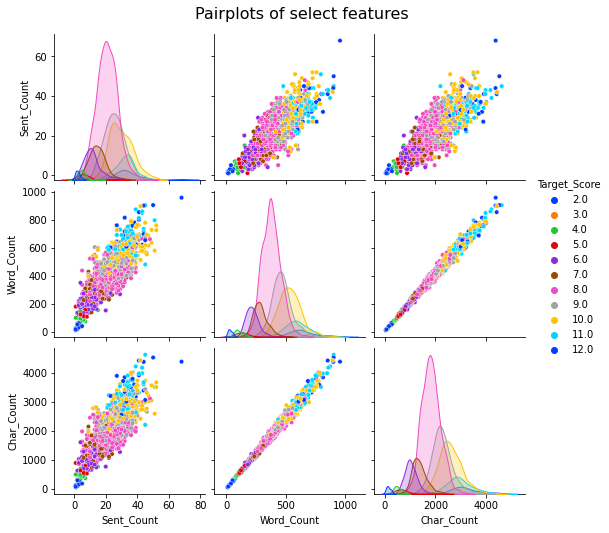

In [35]:
import seaborn as sns

# Plot correlation of essay-length related features
cols = ['Sent_Count', 'Word_Count', 'Char_Count']
#        'Avg_Word_Count',
#        'Verb_Count', 'Noun_Count', 'Adj_Count', 'Conj_Count', 'Adverb_Count',
#        'pNoun_Count', 'Count_Fullstops', 'Count_Exclamation', 'Count_Comma',
#        'Count_Questionmark', 'Count_Hyphens', 'Capitalization_Errors',
#        'Grammar_Error_Count', 'Punctuation_Errors']
        
g = sns.pairplot(Data_Essay_01_Features, hue='Target_Score', vars=cols, plot_kws={"s": 20}, palette="bright")
g.fig.subplots_adjust(top=.93)
g.fig.suptitle('Pairplots of select features', fontsize=16)
plt.show()